In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
location = r'/Users/Annamira/Downloads/boston_co.csv' 
DF = pd.read_csv(location, engine='python')
DF

,State Code,County Code,Tribal Code,Site ID,Support Agency Code,Location Address,City Code,Postal Code,Local ID,Local Name,...,Duration Code,Method ID,Measure Unit Code,Sample Collection Start Date,Sample Collection Start Time,Measure Value,Measure Unit,Null Data Code,Qualifier Code,Data Validity Code
0,\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-01 00:00:00,00:00:00,0.670,ppm,NaN,NaN,NaN
1,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-02 00:00:00,00:00:00,1.053,ppm,NaN,NaN,NaN
2,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-03 00:00:00,00:00:00,0.253,ppm,NaN,NaN,NaN
3,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-04 00:00:00,00:00:00,0.304,ppm,NaN,NaN,NaN
4,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-05 00:00:00,00:00:00,0.343,ppm,NaN,NaN,NaN
5,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-06 00:00:00,00:00:00,0.277,ppm,NaN,NaN,NaN
6,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-07 00:00:00,00:00:00,0.274,ppm,NaN,NaN,NaN
7,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-08 00:00:00,00:00:00,0.252,ppm,NaN,NaN,NaN
8,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-09 00:00:00,00:00:00,0.405,ppm,NaN,NaN,NaN
9,\t\t\t\tMA,'025,NaN,'250250042,'0660,HARRISON AV,7000,'02119,Boston Roxbury,BOSTON,...,1,'593,'007,2017-01-10 00:00:00,00:00:00,0.514,ppm,NaN,NaN,NaN


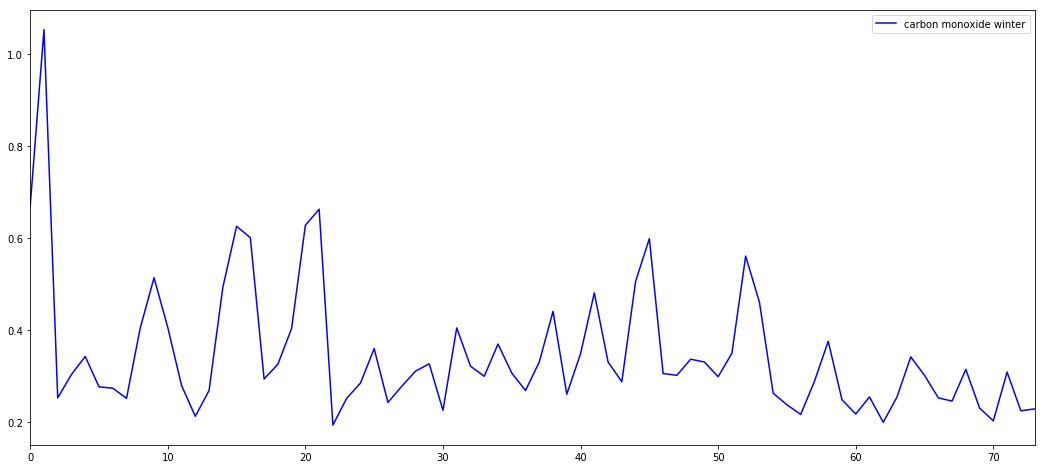

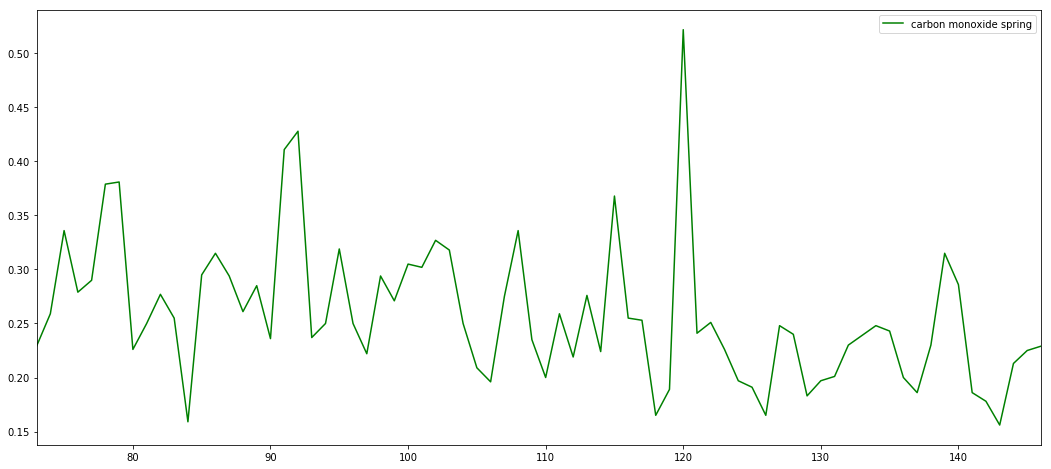

In [23]:
# SEASONALITY

DF_boston_rox_winter = DF[((DF['Local ID'] == 'Boston Roxbury') & (DF['Sample Collection Start Date'].values <= '2017-03-15 00:00:00'))]
DF_boston_rox_winter.plot(y='Measure Value', use_index=True, label='carbon monoxide winter', figsize=(18, 8), color='blue')

DF_boston_rox_spring = DF[((DF['Local ID'] == 'Boston Roxbury') & (DF['Sample Collection Start Date'].values >= '2017-03-15 00:00:00'))]
DF_boston_rox_spring.plot(y='Measure Value', use_index=True, label='carbon monoxide spring', figsize=(18, 8), color='green')

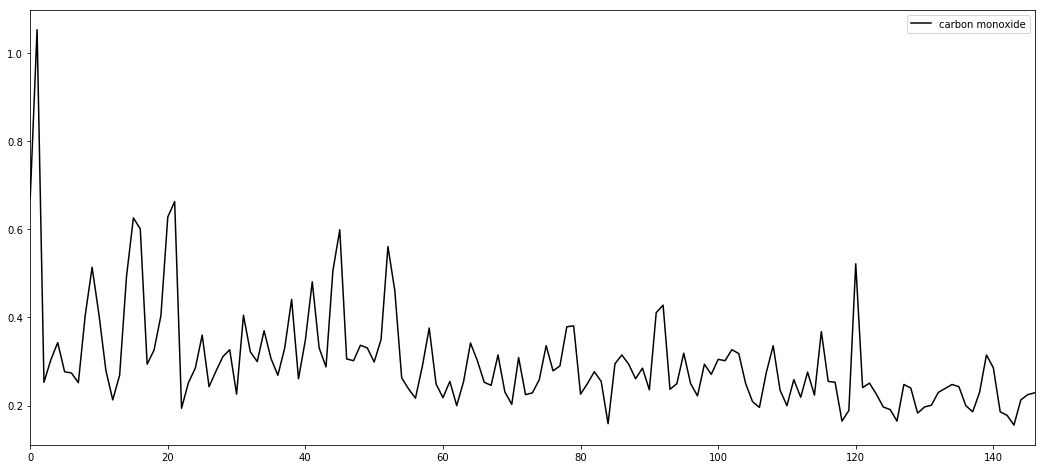

In [24]:
# BOSTON ROXBURY

DF_boston_rox = DF[DF['Local ID'] == 'Boston Roxbury']
DF_boston_rox.plot(y='Measure Value', use_index=True, label='carbon monoxide', figsize=(18, 8), color='black')

(array([  4.,   6.,  10.,  12.,  14.,  23.,  11.,  11.,  13.,   9.,   7.,
          3.,   3.,   4.,   1.,   2.,   0.,   1.,   2.,   2.,   1.,   0.,
          1.,   0.,   2.,   0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.156  ,  0.17394,  0.19188,  0.20982,  0.22776,  0.2457 ,
         0.26364,  0.28158,  0.29952,  0.31746,  0.3354 ,  0.35334,
         0.37128,  0.38922,  0.40716,  0.4251 ,  0.44304,  0.46098,
         0.47892,  0.49686,  0.5148 ,  0.53274,  0.55068,  0.56862,
         0.58656,  0.6045 ,  0.62244,  0.64038,  0.65832,  0.67626,
         0.6942 ,  0.71214,  0.73008,  0.74802,  0.76596,  0.7839 ,
         0.80184,  0.81978,  0.83772,  0.85566,  0.8736 ,  0.89154,
         0.90948,  0.92742,  0.94536,  0.9633 ,  0.98124,  0.99918,
         1.01712,  1.03506,  1.053  ]),
 <a list of 50 Patch objects>)

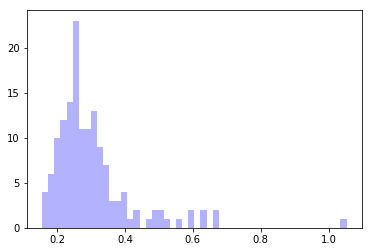

In [5]:
# BOSTON ROXBURY HISTOGRAM

plt.hist(DF_boston_rox['Measure Value'], bins=50, color='blue', alpha=0.3)

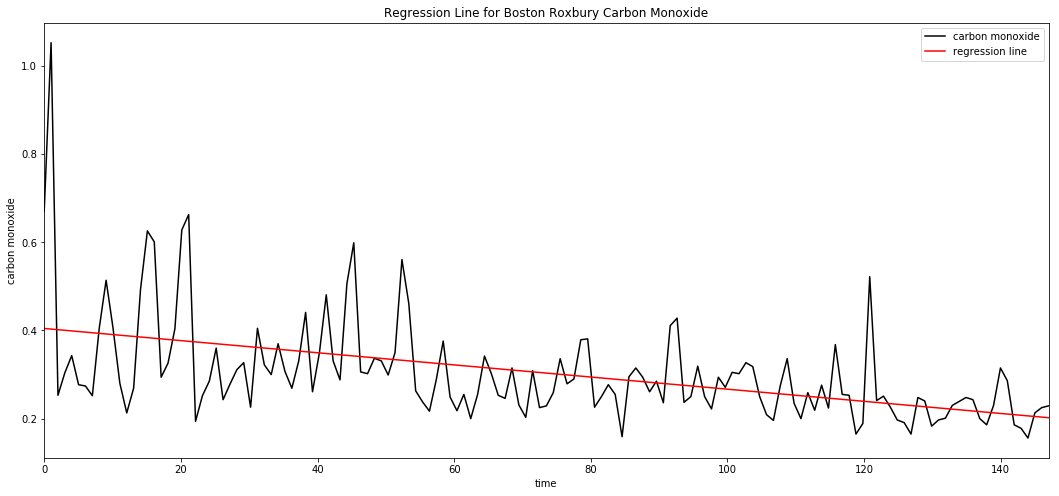

In [22]:
# LINEAR REGRESSION FOR BOSTON ROXBURY

X_train = np.linspace(0, 147, 147)
y_train = DF_boston_rox['Measure Value']

#create an instance of a linear regression object
linear_model = LinearRegression()
#fit the linear regression model to our training data
#you need to worry about the shape of X_train!!!!
linear_model.fit(X_train.reshape((len(X_train), 1)), y_train)

X_s = np.linspace(0, 147, 147)
#get the slope and intercept we found for the model
m = linear_model.coef_ 
b = linear_model.intercept_

#Plot data against MLE model
DF_boston_rox.plot(x=X_train, y='Measure Value', label='carbon monoxide', figsize=(18, 8), color='black')
plt.plot(X_s, m * X_s + b, color='red', label='regression line')

#Set plot title
plt.title('Regression Line for Boston Roxbury Carbon Monoxide')
#Set axes labels
plt.xlabel('time')
plt.ylabel('carbon monoxide')
#Display plot
plt.legend(loc='best')
plt.show()

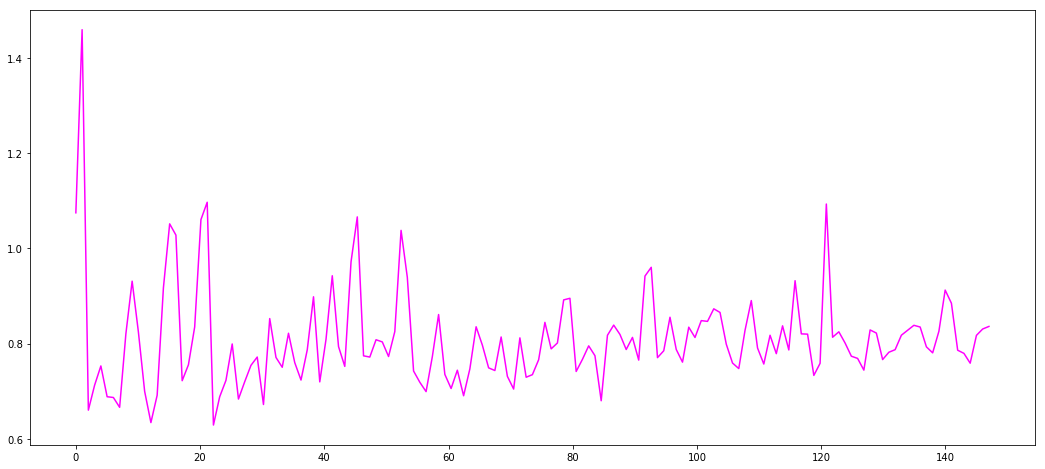

In [14]:
# DE-TREND

plt.figure(figsize=(18,8))
plt.plot(X_s, y_train - m * X_s + b, color='magenta', label='de-trend line')

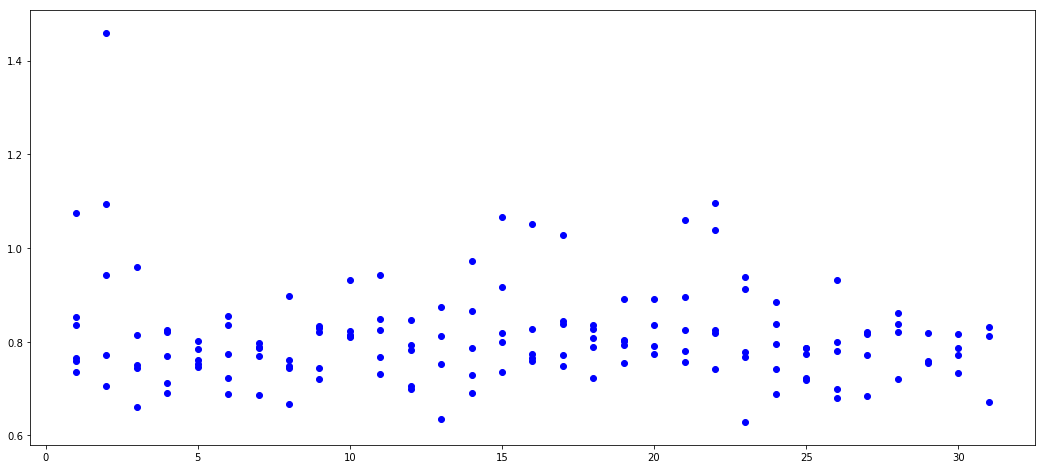

In [32]:
# THROW AWAY MONTH INFO

def get_day(string):
    date = string.split()[0]
    date = date.split('-')[2]
    date = int(date)
    return date

DF_boston_rox_days = DF_boston_rox['Sample Collection Start Date'].apply(get_day)

plt.figure(figsize=(18,8))
plt.scatter(DF_boston_rox_days, y_train - m * X_s + b, color='blue', label='month cycle')


/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


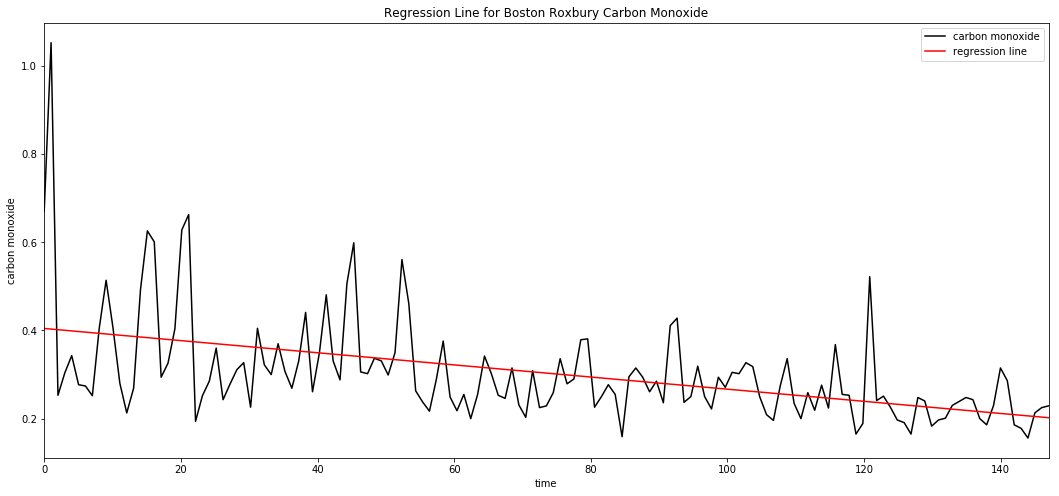

In [37]:
# POLYNOMIAL FIT

#Try fitting a polynomial regression model. Hint: remember that a polynomial model is secretly a linear model
degree = 4

#create a tool for turning one variable, square footage, into multiple variables, A^2, A^3, etc
poly = PolynomialFeatures(degree)
#add polynomial terms to our data
X_poly = poly.fit_transform(DF_boston_rox_days.reshape((len(DF_boston_rox_days), 1)))

#create an instance of a linear regression object
linear_model = LinearRegression()
#fit the linear regression model to our training data
#you need to worry about the shape of X_train!!!!
linear_model.fit(X_train.reshape((len(X_train), 1)), y_train)

#get the slope and intercept we found for the model
m = linear_model.coef_ 
b = linear_model.intercept_

#Plot data against MLE model
DF_boston_rox.plot(x=X_train, y='Measure Value', label='carbon monoxide', figsize=(18, 8), color='black')
plt.plot(X_s, m * X_s + b, color='red', label='regression line')

#Set plot title
plt.title('Regression Line for Boston Roxbury Carbon Monoxide')
#Set axes labels
plt.xlabel('time')
plt.ylabel('carbon monoxide')
#Display plot
plt.legend(loc='best')
plt.show()